<a href="https://colab.research.google.com/github/radyani/Data-Science-Journey/blob/main/04-Data_Cleaning/HW_Data_Cleaning_Radyani_Prasasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Load Dataset**

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert TotalCharges datatype into float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Categorical Data Encoding**

## **Data: Payment Method, Encoding: Frequency**

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
#Frequency Encoding
freq_Payment = data.groupby('PaymentMethod').size()/len(data)   
data.loc[:, "{}_freq_encode".format('PaymentMethod')] = data['PaymentMethod'].map(freq_Payment)  
data = data.drop(['PaymentMethod'], axis = 1) 
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_freq_encode
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,29.85,29.85,No,0.335794
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,56.95,1889.50,No,0.228880
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes,0.228880
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,42.30,1840.75,No,0.219225
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes,0.335794


## **Data: Internet Service, Encoding: Mean**

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
#Mean Encoding
mean = data['TotalCharges'].mean()
count = data['TotalCharges'].count()
agg = data.groupby('InternetService')['TotalCharges'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight = 100
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
data.loc[:, 'InternetService_meanEnc'] = data['InternetService'].map(smooth)
data = data.drop(['InternetService'], axis = 1)
data.head()

InternetService
DSL            2126.288114
Fiber optic    3176.455881
No              765.101817
dtype: float64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_freq_encode,InternetService_meanEnc
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,No,No,No,Month-to-month,Yes,29.85,29.85,No,0.335794,2126.288114
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,No,No,One year,No,56.95,1889.50,No,0.228880,2126.288114
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,Month-to-month,Yes,53.85,108.15,Yes,0.228880,2126.288114
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,Yes,No,No,One year,No,42.30,1840.75,No,0.219225,2126.288114
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,No,No,No,Month-to-month,Yes,70.70,151.65,Yes,0.335794,3176.455881


## **Data: Online Security, Encoding: One Hot**

In [ ]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc = enc.fit_transform(data[['OnlineSecurity']]).toarray()
encoded_colm = pd.DataFrame(enc)

In [ ]:
dummy = data[['OnlineSecurity']]
dummy = pd.concat([dummy, encoded_colm], axis = 1)
dummy.head()

,OnlineSecurity,0,1,2
0,No,1.0,0.0,0.0
1,Yes,0.0,0.0,1.0
2,Yes,0.0,0.0,1.0
3,Yes,0.0,0.0,1.0
4,No,1.0,0.0,0.0


In [ ]:
encoded_colm = encoded_colm.rename(columns={0: 'No_OnlineSecurity', 1: 'No_InternetService', 2: 'Yes_OnlineSecurity'})
data = pd.concat([data, encoded_colm], axis = 1) 
data = data.drop(['OnlineSecurity'], axis = 1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_freq_encode,InternetService_meanEnc,No_OnlineSecurity,No_InternetService,Yes_OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Yes,No,...,Month-to-month,Yes,29.85,29.85,No,0.335794,2126.288114,1.0,0.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,No,Yes,...,One year,No,56.95,1889.50,No,0.228880,2126.288114,0.0,0.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,No,...,Month-to-month,Yes,53.85,108.15,Yes,0.228880,2126.288114,0.0,0.0,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,No,Yes,...,One year,No,42.30,1840.75,No,0.219225,2126.288114,0.0,0.0,1.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Month-to-month,Yes,70.70,151.65,Yes,0.335794,3176.455881,1.0,0.0,0.0


## **Data: Contract, Encoding: Mean**


In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
# Mean Encoding
mean = data['TotalCharges'].mean()
count = data['TotalCharges'].count()
agg = data.groupby('Contract')['TotalCharges'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight = 100
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
data.loc[:, 'Contract_meanEnc'] = data['Contract'].map(smooth)
data = data.drop(['Contract'], axis = 1)
data.head()

Contract
Month-to-month    1392.249445
One year          2986.885206
Two year          3647.946075
dtype: float64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_freq_encode,InternetService_meanEnc,No_OnlineSecurity,No_InternetService,Yes_OnlineSecurity,Contract_meanEnc
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Yes,No,...,Yes,29.85,29.85,No,0.335794,2126.288114,1.0,0.0,0.0,1392.249445
1,5575-GNVDE,Male,0,No,No,34,Yes,No,No,Yes,...,No,56.95,1889.50,No,0.228880,2126.288114,0.0,0.0,1.0,2986.885206
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,No,...,Yes,53.85,108.15,Yes,0.228880,2126.288114,0.0,0.0,1.0,1392.249445
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,No,Yes,...,No,42.30,1840.75,No,0.219225,2126.288114,0.0,0.0,1.0,2986.885206
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Yes,70.70,151.65,Yes,0.335794,3176.455881,1.0,0.0,0.0,1392.249445


# **Outlier Handling**

In [ ]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **Before Handling**

In [ ]:
from scipy import stats

<function matplotlib.pyplot.tight_layout>

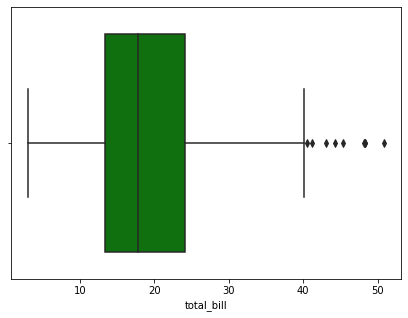

In [ ]:
# Plot of total_bill data before outlier handling
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout

In [ ]:
data[['total_bill']].describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


## **Z Score Outlier Handling**

In [ ]:
# Z Score Handling
print('Row Count before Outlier Handling:', len(data))
data_zHandling = data
data_zHandling['totalBill_zscore'] = abs(stats.zscore(data_zHandling['total_bill']))
data_zHandling = data_zHandling[data_zHandling['totalBill_zscore'] < 3]
print(f'Row Count after z Score Outlier Handling:', len(data_zHandling))
data_zHandling.head()

Row Count before Outlier Handling: 244
Row Count after z Score Outlier Handling: 240


,total_bill,tip,sex,smoker,day,time,size,totalBill_zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


Percentage of Data Erased with Z Score Method: 1.639344262295082 %


<function matplotlib.pyplot.tight_layout>

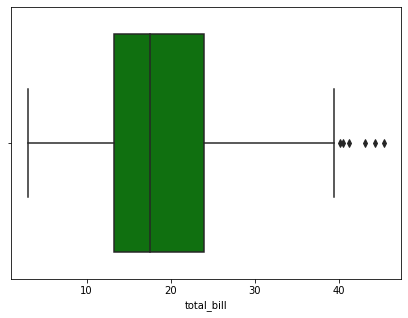

In [ ]:
print(f'Percentage of Data Erased with Z Score Method:', ((len(data)-len(data_zHandling))/len(data))*100, '%')
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data_zHandling['total_bill'],color='green',orient='h')

plt.tight_layout

## **IQR Method Outlier Handling**

In [ ]:
Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR =', IQR)

low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

print(f'low limit =', low_limit, 'high limit =', high_limit)

print('Row Count before Outlier Handling:', len(data))
data_IQR = data
filtered_entries = ((data_IQR['total_bill'] >= low_limit) & (data_IQR['total_bill'] <= high_limit))
data_IQR = data_IQR[filtered_entries]
print(f'Row Count after z Score Outlier Handling:', len(data_IQR))
data_IQR.head()

IQR = 10.779999999999998
low limit = -2.8224999999999945 high limit = 40.29749999999999
Row Count before Outlier Handling: 244
Row Count after z Score Outlier Handling: 235


,total_bill,tip,sex,smoker,day,time,size,totalBill_zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


Percentage of Data Erased with IQR Method: 3.6885245901639343 %


<function matplotlib.pyplot.tight_layout>

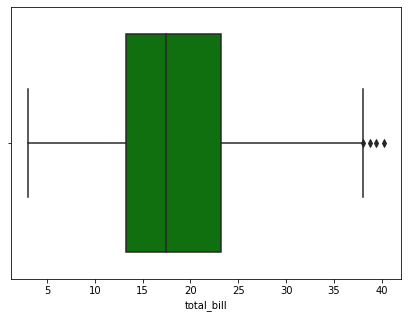

In [ ]:
print(f'Percentage of Data Erased with IQR Method:', ((len(data)-len(data_IQR))/len(data))*100, '%')
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data_IQR['total_bill'],color='green',orient='h')

plt.tight_layout

## **Log the Handled Data: Use IQR Handling Result**

<function matplotlib.pyplot.tight_layout>

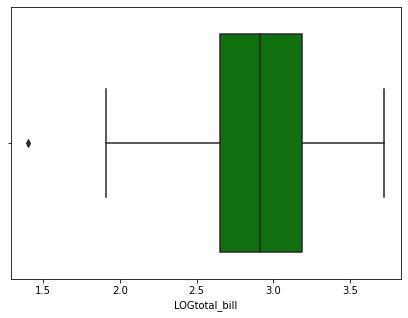

In [ ]:
data_IQR['LOGtotal_bill'] = np.log(data_IQR['total_bill']+1)
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data_IQR['LOGtotal_bill'],color='green',orient='h')

plt.tight_layout

### **Remove data outside log range**

<function matplotlib.pyplot.tight_layout>

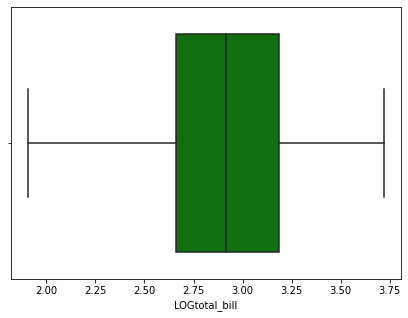

In [ ]:
data_IQR = data_IQR[data_IQR['LOGtotal_bill'] > 1.5]
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data_IQR['LOGtotal_bill'],color='green',orient='h')

plt.tight_layout